In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Log Data 

### 1-1. Log Data Setting

In [12]:
directory = '../data/logdata/2612/'
file_list = os.listdir(directory)
file_list

['01.20221201-2612-S-05-0000001.TXT.LF.TXT.csv',
 '02.20221202-2612-S-08-0000001.TXT.LF.TXT.csv',
 '03.20221203-2612-S-10-0000001.TXT.LF.TXT.csv',
 '04.20221204-2612-S-11-0000001.TXT.LF.TXT.csv',
 '05.20221205-2612-S-01-0000001.TXT.LF.TXT.csv',
 '06.20221206-2612-S-02-0000001.TXT.LF.TXT.csv',
 '07.20221207-2612-S-03-0000001.TXT.LF.TXT.csv',
 '08.20221208-2612-S-05-0000001.TXT.LF.TXT.csv',
 '09.20221209-2612-S-07-0000001.TXT.LF.TXT.csv',
 '10.20221210-2612-S-01-0000001.TXT.LF.TXT.csv',
 '11.20221211-2612-S-02-0000001.TXT.LF.TXT.csv',
 '12.20221212-2612-S-05-0000001.TXT.LF.TXT.csv',
 '13.20221213-2612-S-06-0000001.TXT.LF.TXT.csv',
 '14.20221214-2612-S-07-0000001.TXT.LF.TXT.csv']

In [13]:
gdf = []
for log in file_list[:]:
    directory = directory + log 
    gdf.append(pd.read_csv(directory, encoding='cp949'))
    directory = '../data/logdata/2612/'
gdf[0].columns


Index(['date', 'model_name', 'car_type', 'car_num', 'business_num',
       'driver_code', 'daily_distance', 'cum_distance', 'information_date',
       'car_speed', 'RPM', 'brake_signal', 'car_location_GPS_X',
       'car_location_GPS_Y', 'Global_Positioning_System_GPS_azimuth',
       'accelerationVx', 'accelerationVy', 'status_code'],
      dtype='object')

In [14]:
gdf[0].head()

date model_name  car_type  car_num  business_num  driver_code  \
0  20221201  EDTG-100A        11     2612    6178103560     10000001   
1  20221201  EDTG-100A        11     2612    6178103560     10000001   
2  20221201  EDTG-100A        11     2612    6178103560     10000001   
3  20221201  EDTG-100A        11     2612    6178103560     10000001   
4  20221201  EDTG-100A        11     2612    6178103560     10000001   

   daily_distance  cum_distance  information_date  car_speed  RPM  \
0              44       3093066    22121908232600          0  197   
1              44       3093066    22121908232700          0  605   
2              44       3093066    22121908232800          0  776   
3              44       3093066    22121908232900          0  636   
4              44       3093066    22121908233000          0  577   

   brake_signal  car_location_GPS_X  car_location_GPS_Y  \
0             0           129158634            35236121   
1             0           129158634            35236121   
2             0           129158634            35236121   
3             0           129158634            35236121   
4             0           129158634            35236121   

   Global_Positioning_System_GPS_azimuth  accelerationVx  accelerationVy  \
0                                     63            -5.8            -1.3   
1                                     63            -7.8            -5.0   
2                                     63            -6.9            -3.8   
3                                     63            -5.9            -1.2   
4                                     63            -5.8            -1.1   

   status_code  
0            0  
1            0  
2            0  
3            0  
4            0

### 1-2. Log Data Analysis

#### 1-2-1. Distanse and Speed and Location Correlation

In [90]:
edf = gdf[0][['cum_distance','car_speed','car_location_GPS_X','car_location_GPS_Y','Global_Positioning_System_GPS_azimuth','accelerationVx','accelerationVy']]
edf.head()

cum_distance  car_speed  car_location_GPS_X  car_location_GPS_Y  \
0       3093066          0           129158634            35236121   
1       3093066          0           129158634            35236121   
2       3093066          0           129158634            35236121   
3       3093066          0           129158634            35236121   
4       3093066          0           129158634            35236121   

   Global_Positioning_System_GPS_azimuth  accelerationVx  accelerationVy  
0                                     63            -5.8            -1.3  
1                                     63            -7.8            -5.0  
2                                     63            -6.9            -3.8  
3                                     63            -5.9            -1.2  
4                                     63            -5.8            -1.1

In [91]:
edf.corr()

cum_distance  car_speed  \
cum_distance                               1.000000   0.106420   
car_speed                                  0.106420   1.000000   
car_location_GPS_X                         0.010629  -0.170894   
car_location_GPS_Y                        -0.156592   0.059567   
Global_Positioning_System_GPS_azimuth      0.050910  -0.005973   
accelerationVx                            -0.110948  -0.601230   
accelerationVy                            -0.137931  -0.408850   

                                       car_location_GPS_X  car_location_GPS_Y  \
cum_distance                                     0.010629           -0.156592   
car_speed                                       -0.170894            0.059567   
car_location_GPS_X                               1.000000           -0.431244   
car_location_GPS_Y                              -0.431244            1.000000   
Global_Positioning_System_GPS_azimuth           -0.011746           -0.183090   
accelerationVx                                   0.153946           -0.055826   
accelerationVy                                   0.092151           -0.012123   

                                       Global_Positioning_System_GPS_azimuth  \
cum_distance                                                        0.050910   
car_speed                                                          -0.005973   
car_location_GPS_X                                                 -0.011746   
car_location_GPS_Y                                                 -0.183090   
Global_Positioning_System_GPS_azimuth                               1.000000   
accelerationVx                                                     -0.069143   
accelerationVy                                                     -0.006933   

                                       accelerationVx  accelerationVy  
cum_distance                                -0.110948       -0.137931  
car_speed                                   -0.601230       -0.408850  
car_location_GPS_X                           0.153946        0.092151  
car_location_GPS_Y                          -0.055826       -0.012123  
Global_Positioning_System_GPS_azimuth       -0.069143       -0.006933  
accelerationVx                               1.000000        0.350041  
accelerationVy                               0.350041        1.000000

<AxesSubplot:>

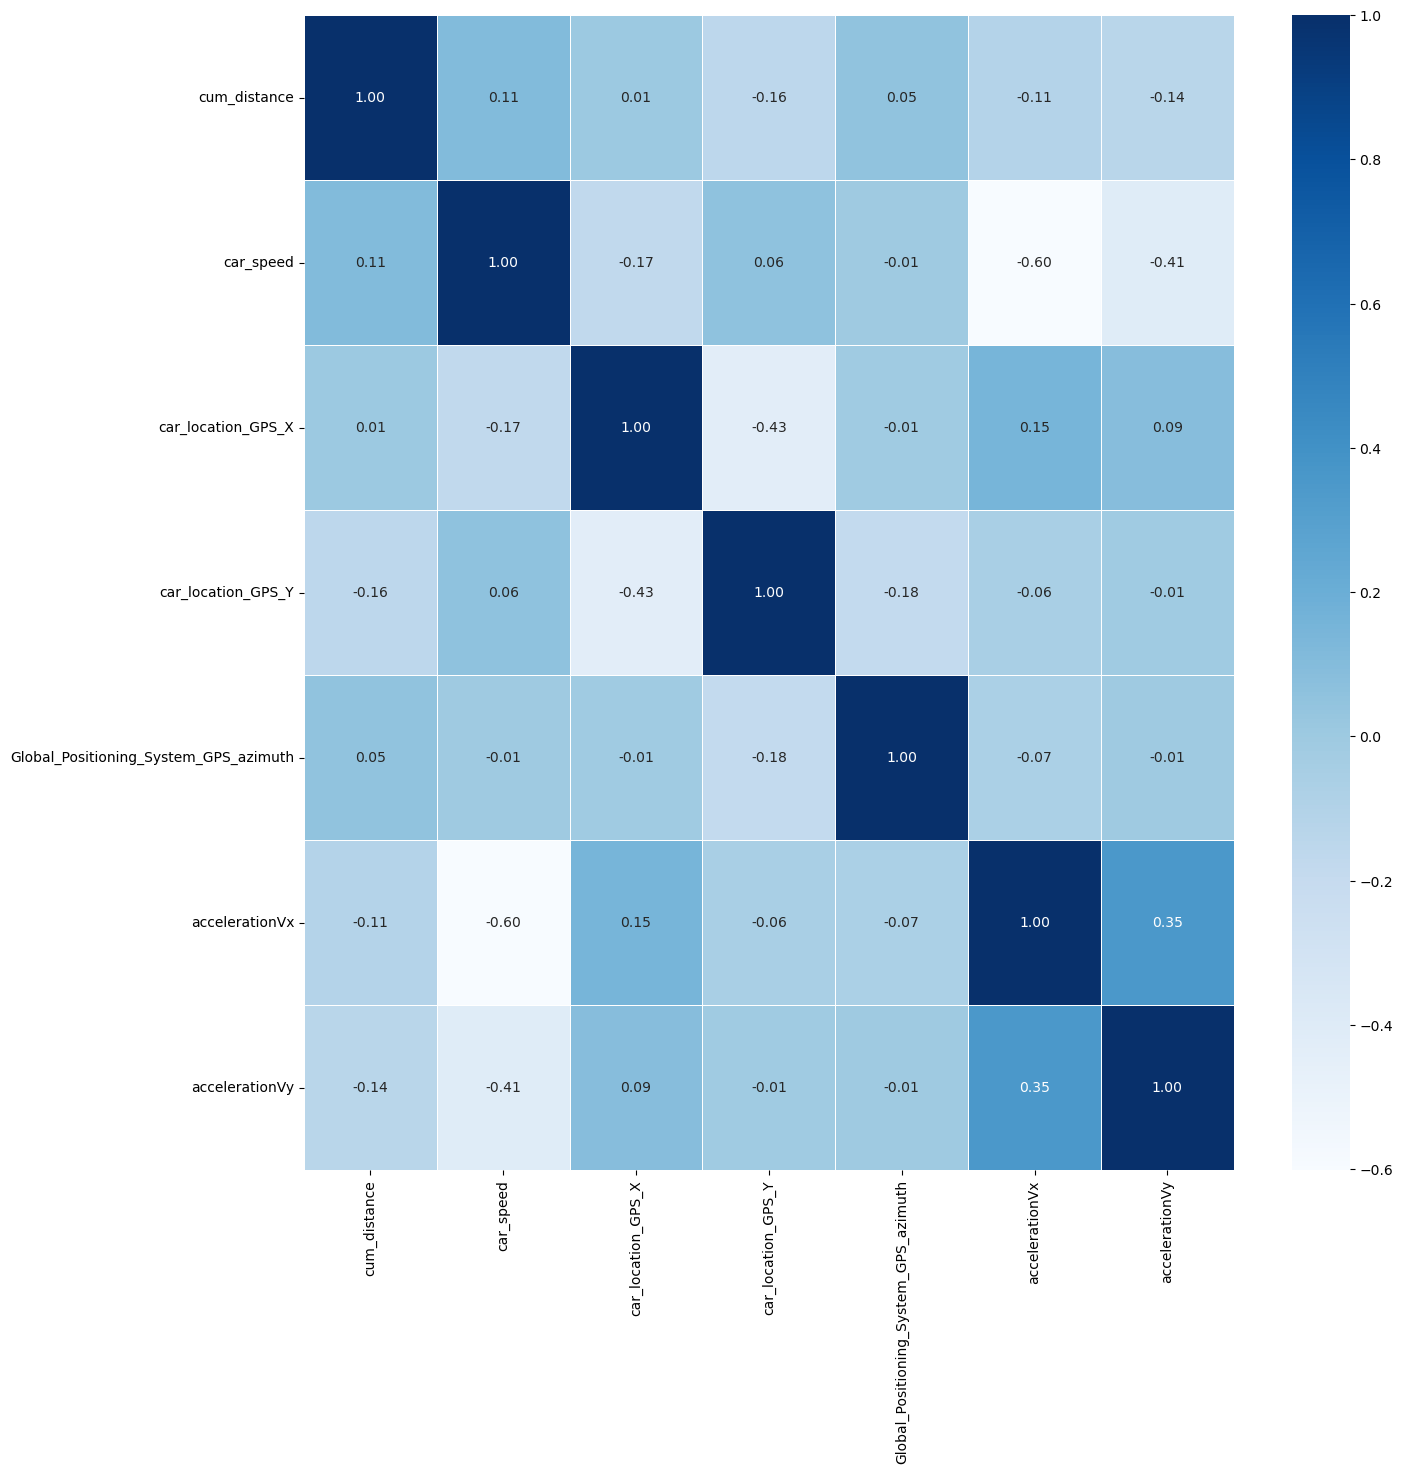

In [92]:
plt.figure(figsize=(15,15))
sns.heatmap(data = edf.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Blues')

#### 1-2-2. Speed, Vehicle and Distanse Correlation 

In [93]:
vdf = gdf[0][['daily_distance', 'cum_distance','car_speed', 'RPM', 'brake_signal','status_code']]
vdf.head()

daily_distance  cum_distance  car_speed  RPM  brake_signal  status_code
0              44       3093066          0  197             0            0
1              44       3093066          0  605             0            0
2              44       3093066          0  776             0            0
3              44       3093066          0  636             0            0
4              44       3093066          0  577             0            0

In [94]:
vdf.corr()

daily_distance  cum_distance  car_speed       RPM  \
daily_distance        1.000000      0.999221   0.108355  0.095050   
cum_distance          0.999221      1.000000   0.106420  0.094286   
car_speed             0.108355      0.106420   1.000000  0.821807   
RPM                   0.095050      0.094286   0.821807  1.000000   
brake_signal          0.051459      0.049038  -0.244641 -0.336956   
status_code           0.007754      0.007414  -0.010758  0.052569   

                brake_signal  status_code  
daily_distance      0.051459     0.007754  
cum_distance        0.049038     0.007414  
car_speed          -0.244641    -0.010758  
RPM                -0.336956     0.052569  
brake_signal        1.000000    -0.055126  
status_code        -0.055126     1.000000

<AxesSubplot:>

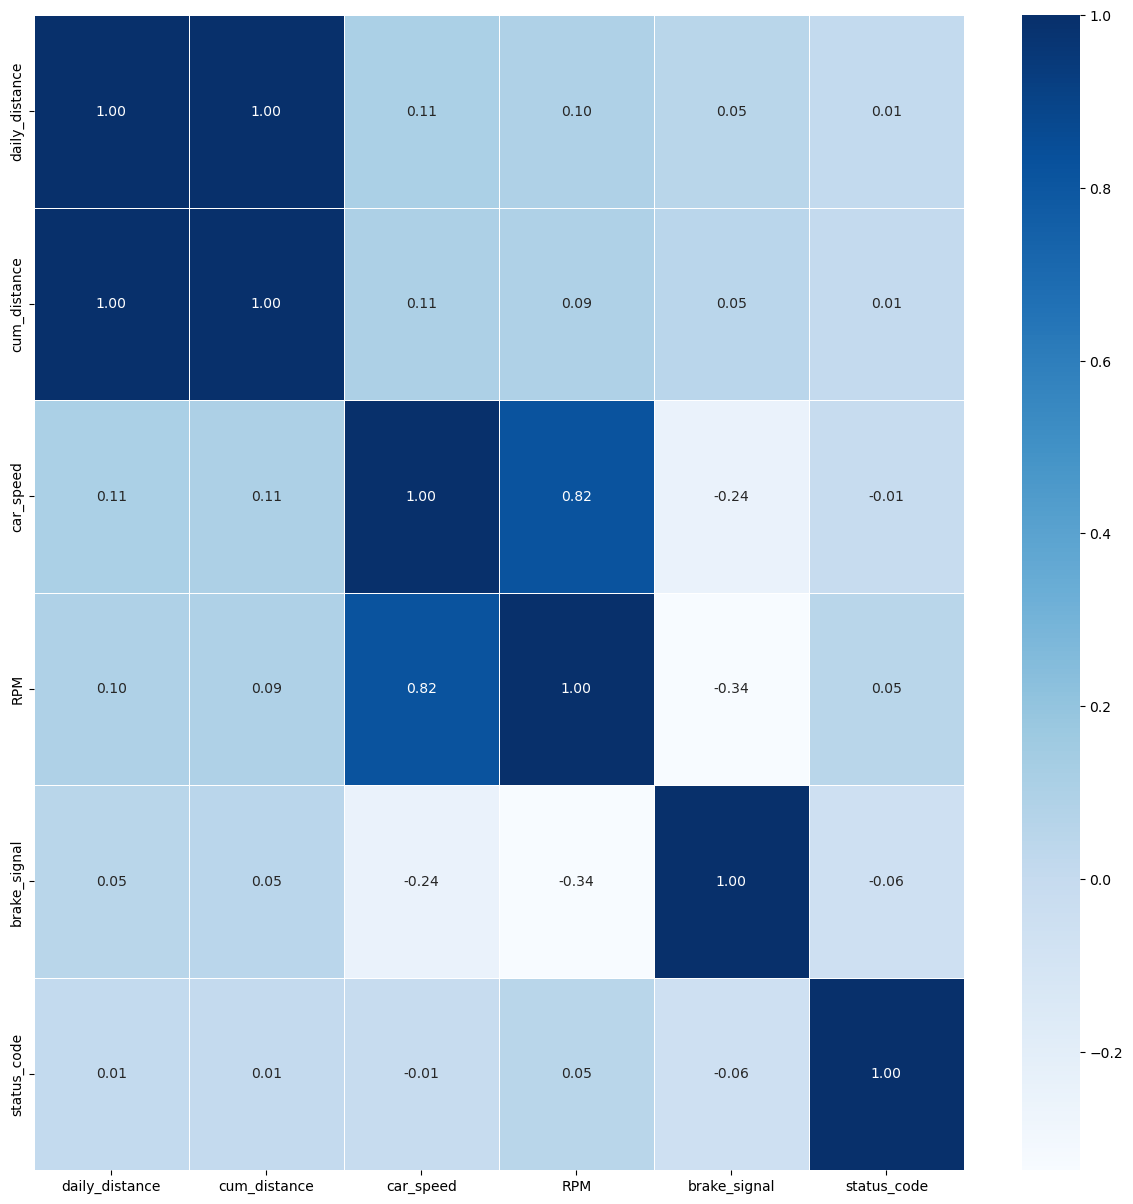

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(data = vdf.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Blues')

#### 1-2-3. Speed Pattern Analysis

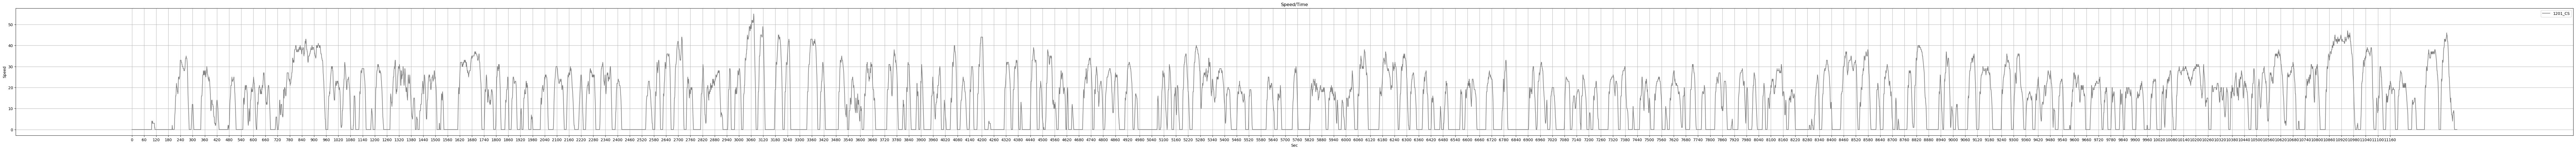

In [184]:
plt.figure(figsize=(120,6))
plt.plot(gdf[7]['car_speed'], label='1201_CS', color='Grey')
plt.title('Speed/Time')            
plt.xlabel('Sec')                            
plt.ylabel('Speed')                      
plt.xticks(x)                                
plt.grid(visible=True)
plt.legend()
plt.show()

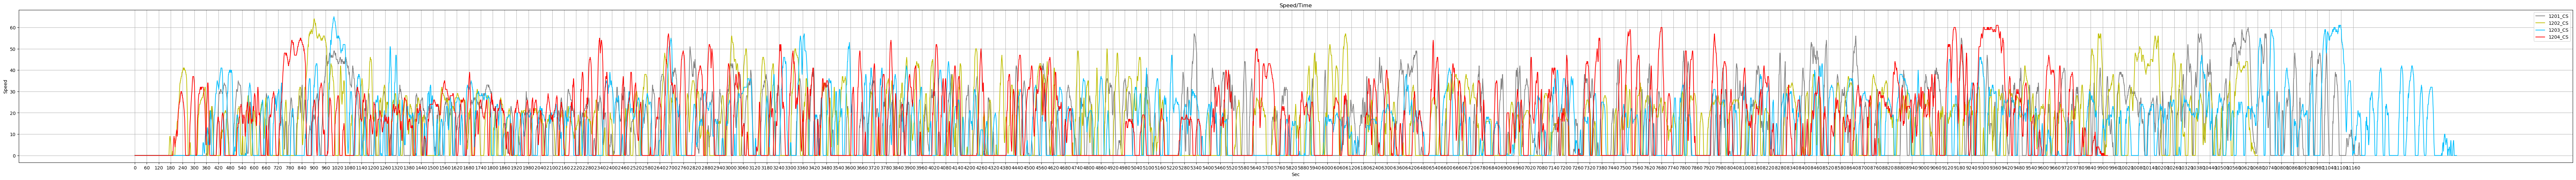

In [100]:
# Speed's Graph
x = np.arange(0,len(gdf[0]),60)
plt.figure(figsize=(100,6))
plt.plot(gdf[0]['car_speed'], label='1201_CS', color='Grey')
plt.plot(gdf[1]['car_speed'], label='1202_CS', color='y')
plt.plot(gdf[2]['car_speed'], label='1203_CS', color='deepskyblue')
plt.plot(gdf[3]['car_speed'], label='1204_CS', color='r')        
plt.title('Speed/Time')            
plt.xlabel('Sec')                            
plt.ylabel('Speed')                      
plt.xticks(x)                                
plt.grid(visible=True)
plt.legend()
plt.show()

#### 1-2-4. GPS Azimuth Analysis

In [ ]:
# 출발시간 맞춤 - 정규화
gdf[0] = gdf[0][367:]
gdf[1] = gdf[1][173:]
gdf[2] = gdf[2][340:]
gdf[0] = gdf[0].reset_index()
gdf[1] = gdf[1].reset_index()
gdf[2] = gdf[2].reset_index()

In [ ]:
gdf[0][['date','Global_Positioning_System_GPS_azimuth']]

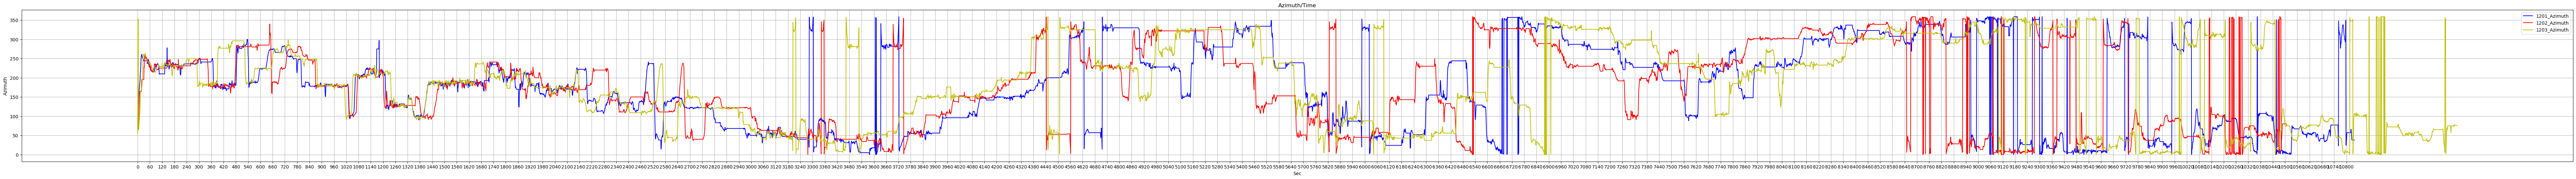

In [41]:
# 유사한 패턴 확인
x = np.arange(0,len(gdf[0]),60)
plt.figure(figsize=(100,6))
plt.plot(gdf[0]['Global_Positioning_System_GPS_azimuth'], label='1201_Azimuth', color='b')
plt.plot(gdf[1]['Global_Positioning_System_GPS_azimuth'], label='1202_Azimuth', color='r')
plt.plot(gdf[2]['Global_Positioning_System_GPS_azimuth'], label='1203_Azimuth', color='y')          
plt.title('Azimuth/Time')            
plt.xlabel('Sec')                            
plt.ylabel('Azimuth')                      
plt.xticks(x)                                
plt.grid(visible=True)
plt.legend()
plt.show()

## 2. Processing Data

In [2]:
car_name = '2612'
dt = '../data/prodata/'
prod_list = os.listdir(dt+car_name)
prod_list


['01.20221201-2612-ProData.csv',
 '02.20221202-2612-ProData.csv',
 '03.20221203-2612-ProData.csv',
 '04.20221204-2612-ProData.csv',
 '05.20221205-2612-ProData.csv',
 '06.20221206-2612-ProData.csv',
 '07.20221207-2612-ProData.csv',
 '08.20221208-2612-ProData.csv',
 '09.20221209-2612-ProData.csv',
 '10.20221210-2612-ProData.csv',
 '11.20221211-2612-ProData.csv',
 '12.20221212-2612-ProData.csv',
 '13.20221213-2612-ProData.csv',
 '14.20221214-2612-ProData.csv']

In [5]:
pros = []
for pl in prod_list[:]:
    pros.append(pd.read_csv(dt+car_name+'/'+pl, encoding='cp949'))
    break

In [6]:
pros[0].tail()

date  car_num  brake_signal  RPMS  ACC  FS  RPMSR  ACCR  SRA
11202  20221201     2612             0   0.0  0.0   0      0     0    0
11203  20221201     2612             0   0.0  0.0   0      0     0    0
11204  20221201     2612             0   0.0  0.0   0      0     0    0
11205  20221201     2612             0   0.0  0.0   0      0     0    0
11206  20221201     2612             0   0.0  0.0   0      0     0    0

### 2-1.Processing DataFrame Setting

In [ ]:
prodata = []
for n in range(0,len(gdf),1):
    prodata.append(gdf[n][['date','car_num','brake_signal']])
    #RPMS = RPMSlops(RPM 변화량)
    prodata[n]['RPMS'] = 0
    for j in range(1,len(prodata[n])-1,1):
        prodata[n]['RPMS'][j] = (gdf[n]['RPM'][j] - gdf[n]['RPM'][j-1])/2
    #ACC = ACCeleration(가속도)
    prodata[n]['ACC'] = 0
    for i in range(1,len(prodata[n])-1,1):
        prodata[n]['ACC'][i] = (gdf[n]['car_speed'][i] - gdf[n]['car_speed'][i-1])/2
    #FS = fast speed(과속)
    prodata[n]['FS'] = np.where(gdf[n]['car_speed'] > 50, 1, 0)
    #RPMSR = RPMSlops Rapid(급격한 RPM 변화 - 변화없음 : 0, + 변화량 : 1, - 변화량 : 2)
    prodata[n]['RPMSR'] = np.where(prodata[n]['RPMS'] > 350, 1, np.where(prodata[n]['RPMS'] < -350, 2, 0))
    #ACCR = ACCeleration Rapid(급격한 가속도 변화량 - 변화없음 : 0, + 변화량 : 1, - 변화량 : 2)
    prodata[n]['ACCR'] = np.where(prodata[n]['ACC'] >= 4, 4, np.where(prodata[n]['ACC'] <= -4, 7, 0))
    #SRA = prodata[n]['RPMSR'] + prodata[n]['ACCR']
    prodata[n]['SRA'] = prodata[n]['RPMSR'] + prodata[n]['ACCR']

    protitle = file_list[n][:17] + 'ProData.csv'
    prodata[n].to_csv(protitle ,mode='w' ,index=False)
    protitle = ''


In [75]:
prodata[2].tail()

date  car_num  brake_signal  RPMS  ACC  FS  RPMSR  ACCR  SRA
11365  20221203     9582             0   0.0  0.0   0      0     0    0
11366  20221203     9582             0   0.0  0.0   0      0     0    0
11367  20221203     9582             0   0.0  0.0   0      0     0    0
11368  20221203     9582             0   0.0  0.0   0      0     0    0
11369  20221203     9582             0   0.0  0.0   0      0     0    0

In [67]:
prod = []
dire = './data/prodata/2612/'
fili = os.listdir(dire)
for pro in fili[:]:
    dire = dire + pro
    prod.append(pd.read_csv(dire, encoding='cp949'))
    dire = './data/prodata/2612/'
prod[0].tail()

date  car_num  brake_signal  RPMS  ACC  FS  RPMSR  ACCR  SRA
11202  20221201     2612             0   0.0  0.0   0      0     0    0
11203  20221201     2612             0   0.0  0.0   0      0     0    0
11204  20221201     2612             0   0.0  0.0   0      0     0    0
11205  20221201     2612             0   0.0  0.0   0      0     0    0
11206  20221201     2612             0   0.0  0.0   0      0     0    0

### 2-2. Processing Data Analysis

#### 2-2-1.Processing Data Visual analysis

In [175]:
dnum = 6

In [ ]:
bs = prod[dnum]['brake_signal'] * 100
bs

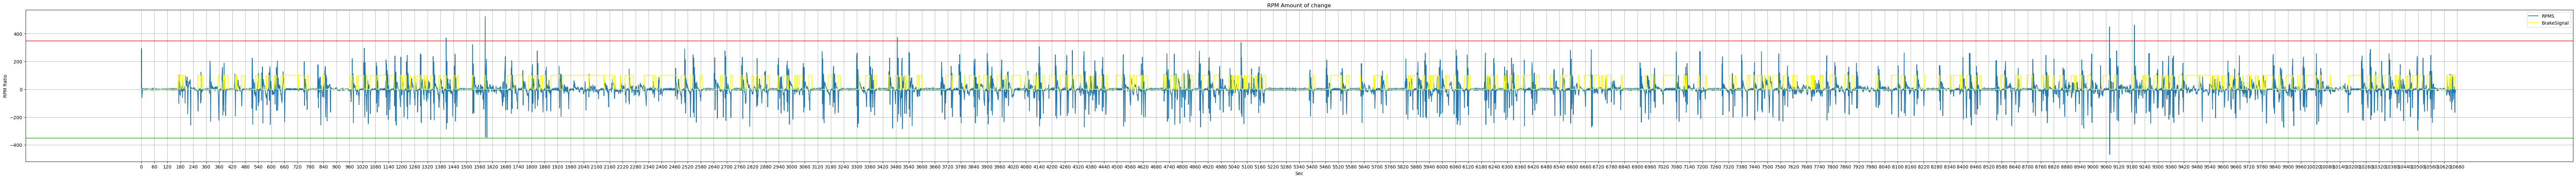

In [18]:
# RPM Amount of Change's Graph
x = np.arange(0,len(prod[dnum]),60)
plt.figure(figsize=(100,6))
plt.plot(prod[dnum]['RPMS'], label='RPMS')      
plt.plot(bs, color='yellow', label='BrakeSignal')
plt.title('RPM Amount of change')            
plt.xlabel('Sec')                            
plt.ylabel('RPM Ratio')                      
plt.xticks(x)                                
plt.grid(visible=True)
plt.axhline(y=350, color='r', linewidth=1)
plt.axhline(y=-350, color='g', linewidth=1)
plt.legend()
plt.show()

In [83]:
# RPM Amount of Change's Average 
aacc = prod[dnum]['ACC'].mean()
aacc

0.0

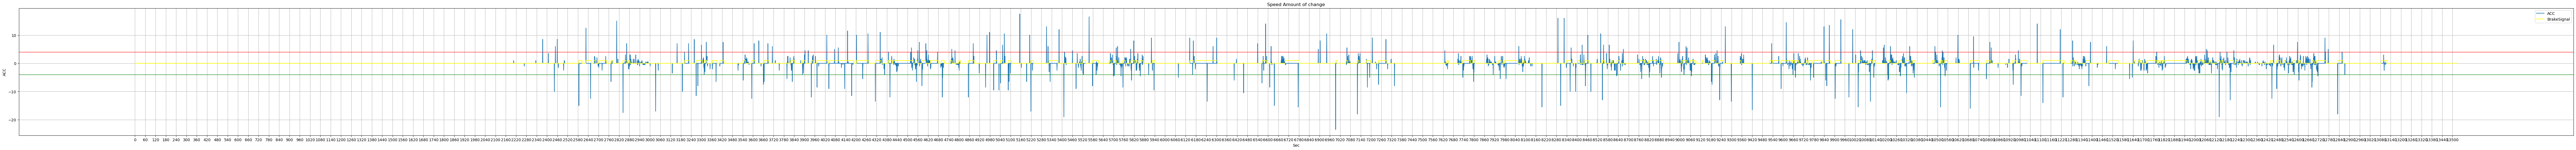

In [185]:
# Acceleration Amount of Change's Graph
x = np.arange(0,len(prod[dnum]),60)
plt.figure(figsize=(120,6))
plt.plot(prod[dnum]['ACC'], label='ACC')        
plt.plot(prod[dnum]['brake_signal'], color='yellow', label='BrakeSignal')
plt.title('Speed Amount of change')          
plt.xlabel('Sec')                            
plt.ylabel('ACC')                            
plt.xticks(x)                               
plt.grid(visible=True)
plt.axhline(y=4, color='r', linewidth=1)
plt.axhline(y=-4, color='g', linewidth=1)
plt.legend()
plt.show()

In [48]:
acc = prod[dnum]['ACC'] * 100

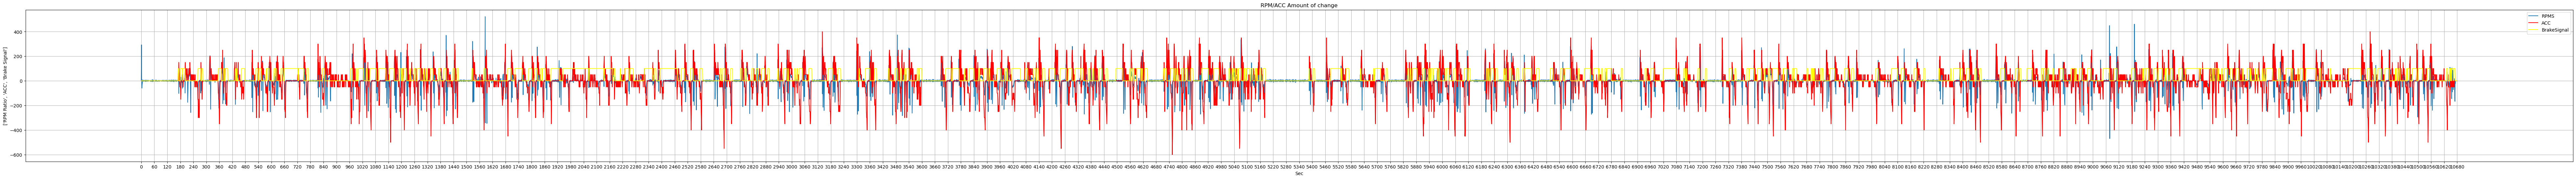

In [49]:
# RPM/ACC Amount of Change's Graph
x = np.arange(0,len(prod[dnum]),60)
plt.figure(figsize=(100,6))
plt.plot(prod[dnum]['RPMS'], label='RPMS')
plt.plot(acc, color='r', label='ACC')
plt.plot(bs, color='yellow', label='BrakeSignal')
plt.title('RPM/ACC Amount of change')      
plt.xlabel('Sec')                       
plt.ylabel(ylabel=['RPM Ratio','ACC','Brake Signal'])                      
plt.xticks(x)                                #
plt.grid(visible=True)
#plt.axhline(y=arpm, color='r', linewidth=1)
plt.legend()
plt.show()

In [ ]:
addf = gdf[0][['car_speed','daily_distance','brake_signal']]
addf['ACC'] = pros[0]['ACC']
addf['daily_distance'] = addf['daily_distance'] - 44

In [17]:
xd = np.arange(0,44,1)

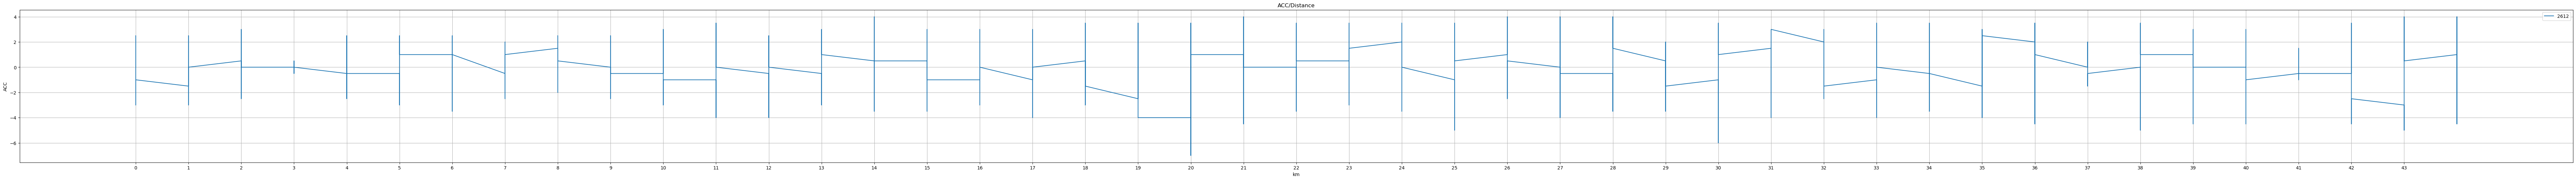

In [18]:
plt.figure(figsize=(100,6))
plt.plot(addf['daily_distance'],addf['ACC'], label='2612')
plt.title('ACC/Distance')            
plt.xlabel('km')                            
plt.ylabel('ACC')                      
plt.xticks(xd)                                
plt.grid(visible=True)
plt.legend()
plt.show()

#### 2-2-2. Data Cluster analysis

#### 2-2-3. RPM Analysis

In [19]:
vel = pros[0].loc[pros[0].RPMS > 0,['RPMS']]
#vel.to_csv('test.csv',encoding='cp949',index=False)
vel

In [67]:
#te = [daily[b] for b in range(len(daily))]
tdf = pd.DataFrame()
te = pros[0].loc[pros[0].RPMS < 0,['RPMS']]
te
#tdf['a'] = pe
#tdf.reset_index()
#tdf
#tdf = pd.concat([tdf, te])
#tdf.to_csv('test.csv')


RPMS
3      -70.0
4      -29.5
5      -16.5
7       -0.5
8       -0.5
...      ...
11194   -5.0
11195   -0.5
11196 -181.0
11197  -91.0
11198  -16.5

[5886 rows x 1 columns]

In [97]:
for o in range(0, len(pros), 1):
    #te = pros[0].loc[pros[0].RPMS < 0,['RPMS']] 
    adf = pd.DataFrame()
    adf['RPM + ' + str(o+1)] = pros[o].loc[pros[o].RPMS > 0,['RPMS']]
    bdf = pd.DataFrame()
    bdf['RPM - ' + str(o+1)] = pros[o].loc[pros[o].RPMS < 0,['RPMS']]
    adf = adf.reset_index()
    bdf = bdf.reset_index()
cdf = pd.concat([adf,bdf],axis=1)
cdf = cdf.fillna(0)
adf

index  RPM + 1
0         1    204.0
1         2     85.5
2         6      0.5
3         9      7.0
4        10      2.5
...     ...      ...
5091  11184      5.0
5092  11185     76.5
5093  11186    104.0
5094  11190     86.0
5095  11191     31.5

[5096 rows x 2 columns]

In [91]:
bdf

index  RPM - 1
0         3    -70.0
1         4    -29.5
2         5    -16.5
3         7     -0.5
4         8     -0.5
...     ...      ...
5881  11194     -5.0
5882  11195     -0.5
5883  11196   -181.0
5884  11197    -91.0
5885  11198    -16.5

[5886 rows x 2 columns]

In [98]:
cdf

index  RPM + 1  index  RPM - 1
0       1.0    204.0      3    -70.0
1       2.0     85.5      4    -29.5
2       6.0      0.5      5    -16.5
3       9.0      7.0      7     -0.5
4      10.0      2.5      8     -0.5
...     ...      ...    ...      ...
5881    0.0      0.0  11194     -5.0
5882    0.0      0.0  11195     -0.5
5883    0.0      0.0  11196   -181.0
5884    0.0      0.0  11197    -91.0
5885    0.0      0.0  11198    -16.5

[5886 rows x 4 columns]

In [11]:
adf.to_csv('test.csv',encoding='cp949',index=False)

## 3. Driving Uint Data

### 3-1. Driving Unit Data Setting

In [261]:
drivuint = pd.DataFrame(columns=['date',
                         'car_num',
                         'RAC',     #RAC=Rapid ACceleration(급가속)
                         'SDS',     #SDS=Sharp Drop in Speed(급감속)
                         'PRP',     #PRP=Plus RPM(양의 RPM 변화량)
                         'MRP',     #MRP=Minus RPM(음의 RPM 변화량)
                         'FSS',     #FSS=Fest Speed Score
                         'DSR'])    #DSR = Driving Safety Rate(안전운전율)
#drivuint.reset_index(drop=False, inplace=True)                         
drivuint.head()

Empty DataFrame
Columns: [date, car_num, RAC, SDS, PRP, MRP, FSS, DSR]
Index: []

In [262]:
# 열 컬럼 조건 갯수 조회
#produ =len(prod[0].loc[prod[0]['RPMSR'] == 0])
fs = 0
nfs = 0
for o in range(0, len(fili), 1):
    count = len(prod[o])
    for s in range(0, count,1):
        if prod[o]['FS'][s] == 1:
            fs = fs + 1
        if fs >= 60:
            nfs = nfs + 1
            fs = 0
    date = prod[o]['date'][0]
    cn = prod[o]['car_num'][0]
    rac = len(prod[o].loc[prod[o]['ACCR'] == 4])
    sds = len(prod[o].loc[prod[o]['ACCR'] == 7])
    prp = len(prod[o].loc[prod[o]['RPMSR'] == 1])
    mrp = len(prod[o].loc[prod[o]['RPMSR'] == 2])
    dsr = (count - (rac + sds + prp + mrp)) / count * 100
    n_df = pd.DataFrame([[date,cn,rac,sds,prp,mrp,nfs,dsr]],columns=['date','car_num','RAC','SDS','PRP','MRP','FSS','DSR'])
    # drivuint.append(,ignore_index=True)
    drivuint = pd.concat([drivuint,n_df])



In [ ]:
pd.set_option('display.max_rows',None)
drivuint

In [264]:
drivuint.to_csv('9582.csv',mode='w' ,index=False)

### 3-2. Driving Unit Data Analysis

#### 3-2-1. All Driving Unit Data

In [34]:
dudf = pd.read_csv('./data/DrivingUnitData.csv', encoding='cp949')
dudf.describe()

date      car_num         RAC         SDS         PRP  \
count  1.400000e+02   140.000000  140.000000  140.000000  140.000000   
mean   2.022121e+07  6398.700000    2.600000   25.028571    3.142857   
std    4.045603e+00  2455.731838   10.468727   24.184823    4.075848   
min    2.022120e+07  2612.000000    0.000000    0.000000    0.000000   
25%    2.022120e+07  4699.000000    0.000000    9.000000    0.000000   
50%    2.022121e+07  5427.500000    1.000000   17.000000    1.000000   
75%    2.022121e+07  9007.000000    2.000000   33.000000    5.000000   
max    2.022121e+07  9582.000000  123.000000  136.000000   15.000000   

              MRP         FSS         DSR  
count  140.000000  140.000000  140.000000  
mean     0.607143   11.385714   99.721071  
std      1.050498    8.025665    0.258497  
min      0.000000    0.000000   98.078000  
25%      0.000000    5.000000   99.642500  
50%      0.000000    9.500000   99.790000  
75%      1.000000   16.250000   99.883750  
max      6.000000   41.000000  100.000000

In [60]:
dudf['URAC'] = np.where(dudf['RAC'] >= dudf['RAC'].mean(),1,0)
dudf['USDS'] = np.where(dudf['SDS'] >= dudf['SDS'].mean(),1,0)
dudf['UPRP'] = np.where(dudf['PRP'] >= dudf['PRP'].mean(),1,0)
dudf['UMRP'] = np.where(dudf['MRP'] >= dudf['MRP'].mean(),1,0)
dudf['UFSS'] = np.where(dudf['FSS'] >= dudf['FSS'].mean(),1,0)
dudf['DURS'] = dudf['UFSS'] + dudf['URAC'] + dudf['USDS']
dudf['VURS'] = dudf['UPRP'] + dudf['UMRP']

In [63]:
dudf.to_csv('DrivingUnitData.csv',index=False,encoding='utf-8-sig')
dudf

date  car_num  RAC  SDS  PRP  MRP  FSS      DSR  URAC  USDS  UPRP  \
0    20221201     2612    8   50    5    1    2   99.429     1     1     1   
1    20221202     2612    2   79    5    1    5   99.185     0     1     1   
2    20221203     2612    1   81    3    3    9   99.247     0     1     0   
3    20221204     2612    4   87    5    0   14   99.033     1     1     1   
4    20221205     2612    0   33   11    6   15   99.630     0     1     1   
..        ...      ...  ...  ...  ...  ...  ...      ...   ...   ...   ...   
135  20221210     9582    0    1    0    0    8   99.968     0     0     0   
136  20221211     9582    0    0    0    0    8  100.000     0     0     0   
137  20221212     9582    0    0    0    1    8   99.991     0     0     0   
138  20221213     9582    4   59    2    5   13   99.542     1     1     0   
139  20221214     9582    1   50    9    2   15   99.446     0     1     1   

     UMRP  UFSS  DURS  VURS  
0       1     0     2     2  
1       1     0     1     2  
2       1     0     1     1  
3       0     1     3     1  
4       1     1     2     2  
..    ...   ...   ...   ...  
135     0     0     0     0  
136     0     0     0     0  
137     1     0     0     1  
138     1     1     3     1  
139     1     1     2     2  

[140 rows x 15 columns]

In [200]:
x = np.arange(1,len(dudf)+1,1)

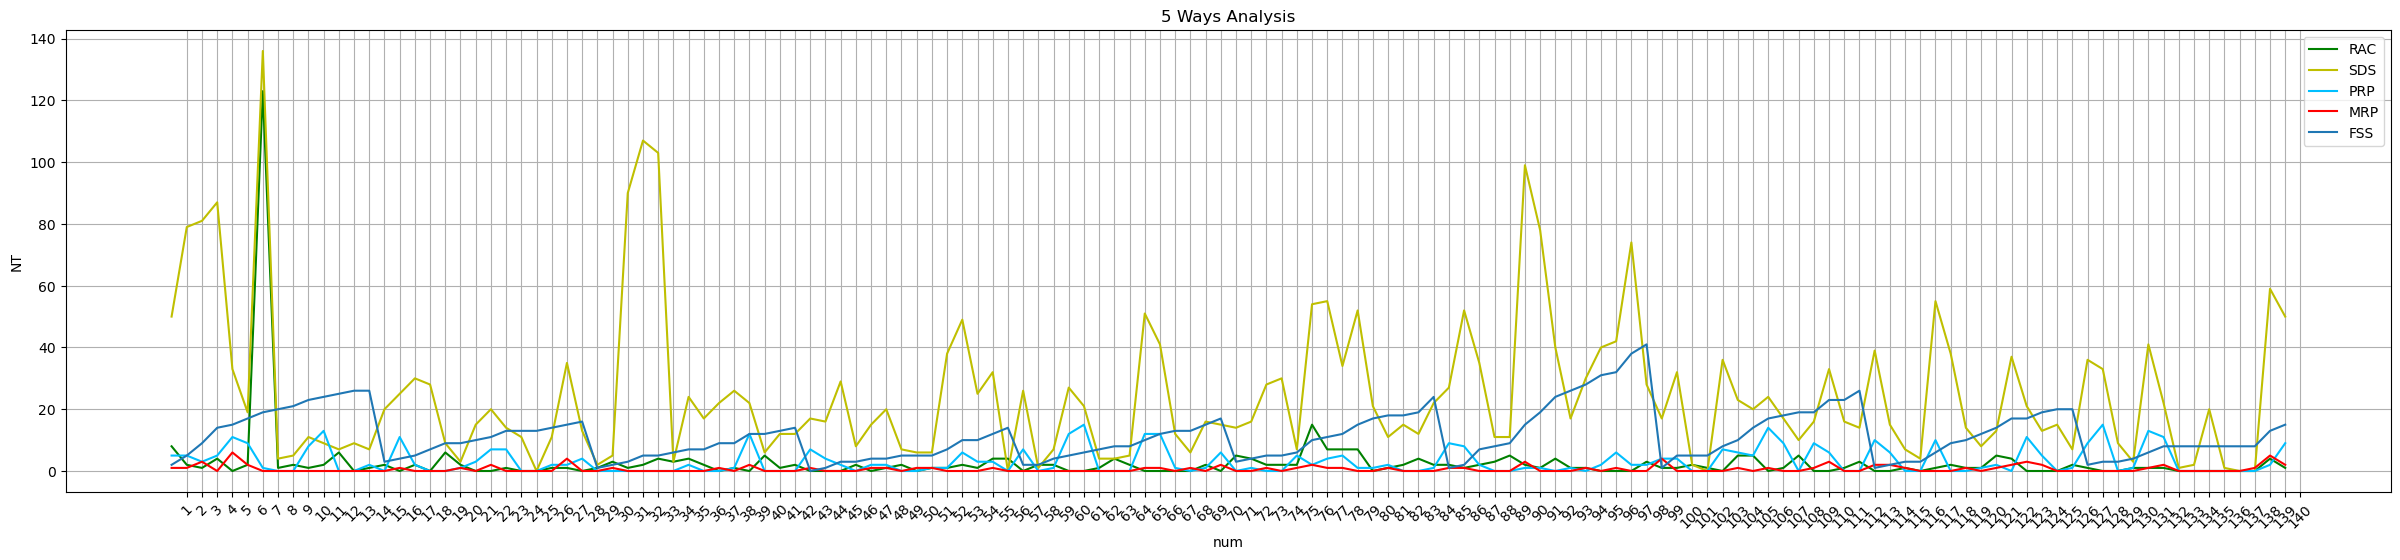

In [202]:
plt.figure(figsize=(30,6))
plt.plot(dudf['RAC'], label='RAC', color='Green')
plt.plot(dudf['SDS'], label='SDS', color='y')
plt.plot(dudf['PRP'], label='PRP', color='deepskyblue')
plt.plot(dudf['MRP'], label='MRP', color='r')
plt.plot(dudf['FSS'], label='FSS')        
plt.title('5 Ways Analysis')            
plt.xlabel('num')                            
plt.ylabel('NT')                      
plt.xticks(x, rotation=45)                                
plt.grid(visible=True)
plt.legend()
plt.show()

#### 3-2-2. Individual Driving Unit Data

In [42]:
vehidire = './data/vehinfodata/'
vehi_list = os.listdir(vehidire)
vehi_list

['2612.csv',
 '3897.csv',
 '4699.csv',
 '4985.csv',
 '5221.csv',
 '5634.csv',
 '8993.csv',
 '9007.csv',
 '9357.csv',
 '9582.csv']

In [43]:
vehidf = []
for vh in vehi_list[:]:
    vehidf.append(pd.read_csv(vehidire+vh,encoding='cp949'))


In [40]:
car = '2612'
ndf = 0
vehidf[ndf]

date  car_num  RAC  SDS  PRP  MRP  FSS     DSR
0   20221201     4985    0   17    7    1    0  99.788
1   20221202     4985    0   16    4    0    1  99.809
2   20221203     4985    0   29    2    0    3  99.715
3   20221204     4985    2    8    0    0    3  99.906
4   20221205     4985    0   15    2    1    4  99.862
5   20221206     4985    1   20    2    1    4  99.784
6   20221207     4985    2    7    0    0    5  99.921
7   20221208     4985    0    6    0    1    5  99.940
8   20221209     4985    1    6    1    1    5  99.903
9   20221210     4985    1   38    1    0    7  99.646
10  20221211     4985    2   49    6    0   10  99.484
11  20221212     4985    1   25    3    0   10  99.752
12  20221213     4985    4   32    3    1   12  99.615
13  20221214     4985    4    0    0    0   14  99.964

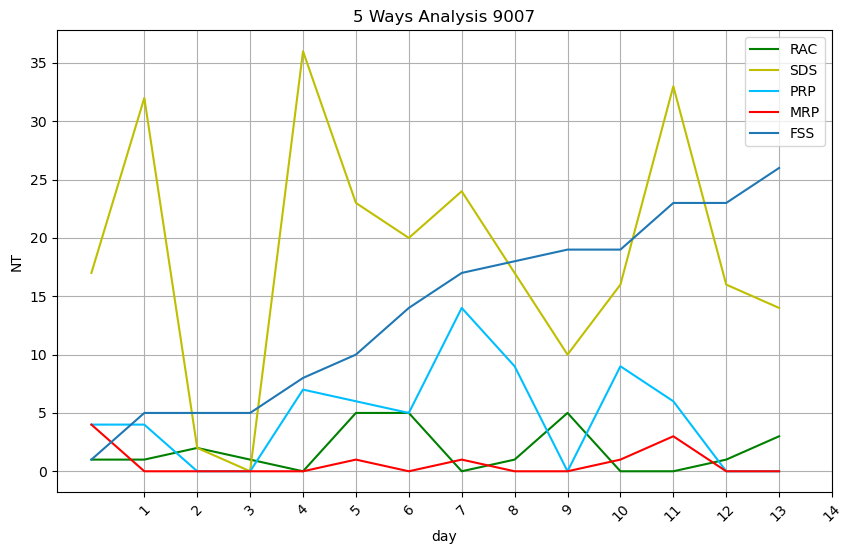

In [299]:

plt.figure(figsize=(10,6))
x=np.arange(1,15,1)
plt.plot(vehidf[ndf]['RAC'], label='RAC', color='Green')       #RAC=Rapid ACceleration(급가속)
plt.plot(vehidf[ndf]['SDS'], label='SDS', color='y')           #SDS=Sharp Drop in Speed(급감속)
plt.plot(vehidf[ndf]['PRP'], label='PRP', color='deepskyblue') #PRP=Plus RPM(양의 RPM 변화량)
plt.plot(vehidf[ndf]['MRP'], label='MRP', color='r')           #MRP=Minus RPM(음의 RPM 변화량)
plt.plot(vehidf[ndf]['FSS'], label='FSS')                      #FSS=Fest Speed Score(과속)
plt.title('5 Ways Analysis ' + car)            
plt.xlabel('day')                            
plt.ylabel('NT')                      
plt.xticks(x, rotation=45)                                
plt.grid(visible=True)
plt.legend()
plt.show()


In [44]:
drivstats = pd.DataFrame({'car_num':['ALL'],
                         'RACM':[racmean],     #RAC=Rapid ACceleration(급가속)
                         'SDSM':[sdsmean],     #SDS=Sharp Drop in Speed(급감속)
                         'PRPM':[prpmean],     #PRP=Plus RPM(양의 RPM 변화량)
                         'MRPM':[mrpmean],     #MRP=Minus RPM(음의 RPM 변화량)
                         'FSSM':[fssmean],     #FSS=Fest Speed Score
                         'RACS':[racsum],     
                         'SDSS':[sdssum],     
                         'PRPS':[prpsum],     
                         'MRPS':[mrpsum],     
                         'FSSS':[fsssum]})    
drivstats

car_num  RACM       SDSM      PRPM      MRPM       FSSM  RACS  SDSS  PRPS  \
0     ALL   2.6  25.028571  3.142857  0.607143  11.385714   364  3504   440   

   MRPS  FSSS  
0    85  1594

In [45]:

for o in range(0, len(vehidf), 1):
    carn = vehidf[o]['car_num'][0]
    racm = vehidf[o]['RAC'].mean()
    sdsm = vehidf[o]['SDS'].mean()
    prpm = vehidf[o]['PRP'].mean()
    mrpm = vehidf[o]['MRP'].mean()
    fssm = vehidf[o]['FSS'].mean()
    racs = vehidf[o]['RAC'].sum()
    sdss = vehidf[o]['SDS'].sum()
    prps = vehidf[o]['PRP'].sum()
    mrps = vehidf[o]['MRP'].sum()
    fsss = vehidf[o]['FSS'].sum()
    i_df = pd.DataFrame([[carn,racm,sdsm,prpm,mrpm,fssm,racs,sdss,prps,mrps,fsss]],
                        columns=['car_num','RACM','SDSM','PRPM','MRPM','FSSM','RACS','SDSS','PRPS','MRPS','FSSS'])
    # drivuint.append(,ignore_index=True)
    drivstats = pd.concat([drivstats,i_df])

In [46]:
drivstats.to_csv('Drivstats.csv',mode='w' ,index=False)

In [47]:
#RAC=Rapid ACceleration(급가속)
#SDS=Sharp Drop in Speed(급감속)
#PRP=Plus RPM(양의 RPM 변화량)
#MRP=Minus RPM(음의 RPM 변화량)
#FSS=Fest Speed Score
dristats = pd.read_csv('./Drivstats.csv',encoding='cp949')
dristats

car_num    RACM    SDSM    PRPM   MRPM    FSSM  RACS  SDSS  PRPS  MRPS  \
0      ALL   2.600  25.029  3.1429  0.607  11.386   364  3504   440    85   
1     2612  10.929  38.357  4.4286  0.929  17.571   153   537    62    13   
2     3897   1.071  16.714  2.7857  0.571  10.143    15   234    39     8   
3     4699   2.071  32.214  1.0714  0.286   7.500    29   451    15     4   
4     4985   1.286  19.143  2.2143  0.429   5.929    18   268    31     6   
5     5221   0.929  16.857  4.7857  0.357   8.714    13   236    67     5   
6     5634   4.286  26.500  1.5714  0.500  11.929    60   371    22     7   
7     8993   1.786  41.714  2.4286  0.500  20.071    25   584    34     7   
8     9007   1.786  18.571  4.5714  0.714  13.786    25   260    64    10   
9     9357   1.214  20.429  3.2857  1.000  10.929    17   286    46    14   
10    9582   0.643  19.786  4.2857  0.786   7.286     9   277    60    11   

    FSSS  
0   1594  
1    246  
2    142  
3    105  
4     83  
5    122  
6    167  
7    281  
8    193  
9    153  
10   102

## 4. Vehicle Information Data

### 4-1. Vehicle Information DataFrame Setting

In [53]:
vehinfo = pd.DataFrame({'car_num':['2612','3897','4699','4985','5221','5634','8993','9007','9357','9582'],
                        'car_type':[11,11,11,11,11,11,11,11,11,11],
                        'DRS':[2,1,2,1,1,2,2,1,1,0],                     #DRS=Driving Risk Score
                        'VRS':[2,0,0,1,2,0,0,2,1,2],                     #VRS=Vehicle Risk Score
                        'TS':[4,1,2,2,3,2,2,3,2,2],                      #TS=Total Score
                        'Judgment':['즉시점검','이상없음','주의','주의','위험','주의','주의','위험','주의','주의']})
                        #Judgment(안전 - 0, 이상없음 - 1, 주의 - 2, 위험 - 3, 즉시점검 - 4)     
vehinfo

car_num  car_type  DRS  VRS  TS Judgment
0    2612        11    2    2   4     즉시점검
1    3897        11    1    0   1     이상없음
2    4699        11    2    0   2       주의
3    4985        11    1    1   2       주의
4    5221        11    1    2   3       위험
5    5634        11    2    0   2       주의
6    8993        11    2    0   2       주의
7    9007        11    1    2   3       위험
8    9357        11    1    1   2       주의
9    9582        11    0    2   2       주의

In [56]:
#CSV 파일 변환
vehinfo.to_csv('VehInfoData.csv',index=False,encoding='utf-8-sig')


In [ ]:
#인덱스 변환
#vehinfo1 = vehinfo.set_index('car_num')
#vehinfo1

In [61]:
num = 0
for i in range(0,10081,1):
    if prodata['FS'][i] == 1:
        num = num + 1
    if num == 60:
        vehinfo['FSS'][0] = vehinfo['FSS'][0] + 1

vehinfo.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9556\326237630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehinfo['FSS'][0] = vehinfo['FSS'][0] + 1


car_num  car_type  FSS  DRS  VRS  TS Judgment
0  부산70자1894        11    3    0    0   0         
1  부산70자1860        11    0    0    0   0